<a href="https://colab.research.google.com/github/darshanrao/AR_Region_Classification/blob/main/Bfield_ModelTesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Functions

In [ ]:
def normalized(img):
    normalized_input = (img - np.amin(img)) / (np.amax(img) - np.amin(img))
    return 2*normalized_input-1

In [ ]:
def normalizedp(img):
    normalized_input = (img - np.amin(img)) / (np.amax(img) - np.amin(img))
    return normalized_input

In [ ]:
def normalizedn(img):
    normalized_input = (img - np.amin(img)) / (np.amax(img) - np.amin(img))
    return normalized_input-1

In [ ]:
def plotMean(arr,title,cmap='viridis'):
  font1 = {'family':'serif','color':'Black','size':15}
  arr_mean=np.nanmean(arr,axis=(0))
  plt.imshow(arr_mean,vmax=abs(arr_mean).max(), vmin=-abs(arr_mean).max(),cmap=cmap)
  plt.colorbar()
  plt.xticks([ ])
  plt.yticks([ ])
  plt.title(title,fontdict = font1)

In [ ]:
def createPNList(y_t,y_l,X_t):
  fn_list=[]
  fp_list=[]
  tn_list=[]
  tp_list=[]
  for i in range(len(y_t)):
    if y_t[i]==1 and y_l[i]==0:
      fn_list.append(X_t[i])
    elif y_t[i]==0 and y_l[i]==1:  
      fp_list.append(X_t[i])
    elif y_t[i]==1 and y_l[i]==1: 
      tp_list.append(X_t[i])
    elif y_t[i]==0 and y_l[i]==0: 
      tn_list.append(X_t[i])
    
  fn_np_array = np.array(fn_list).squeeze()
  if len(fn_list)==1:
    fn_np_array = np.expand_dims(fn_np_array, axis=0)
  fp_np_array = np.array(fp_list).squeeze()
  tn_np_array = np.array(tn_list).squeeze()
  tp_np_array = np.array(tp_list).squeeze()
  return tn_np_array,fp_np_array,fn_np_array,tp_np_array

# MODEL LOAD

In [ ]:
from joblib import Parallel, delayed
import joblib 
cnn = joblib.load('drive/MyDrive/Bfield Research/Models/model_SNR12_26_07.pkl')


# AR DATA

In [ ]:
act_data = np.load('drive/MyDrive/Bfield Research/Datasets/darshan_rao_bfield_AR.npz')
lst1 = act_data.files
for item in lst1:
    print(item)
    print(act_data[item].shape)
    act_dataset=act_data[item]

arr
(512, 512, 65)


In [ ]:
new_AR_list=[]
x=int(512/2)
for i in range(65):
  new_AR_list.append(act_dataset[x-42:x+43, x-42:x+43,i])
new_AR_dataset = np.array(new_AR_list)
y_AR_test=np.array([1]*len(new_AR_dataset))

In [ ]:
new_AR_dataset.shape

(65, 85, 85)

In [ ]:
for i in range(len(new_AR_dataset)):
    new_AR_dataset[i]=normalized(new_AR_dataset[i])

In [ ]:
# fig, axes = plt.subplots(8,8, figsize = (64,64))
# count=0
# for i in range(8):
#     for j in  range(8):
#         axes[i,j].imshow(new_AR_dataset[count])
#         count+=1

In [ ]:
new_AR_dataset = new_AR_dataset.reshape(new_AR_dataset.shape[0],85,85,1)
y_AR_pred= cnn.predict(new_AR_dataset)
y_AR_labels= [int(np.around(element)) for element in y_AR_pred]

In [ ]:
len(y_AR_test) , len(y_AR_labels)

(65, 65)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
acc1= accuracy_score(y_AR_test, y_AR_labels)
cm1=confusion_matrix(y_AR_test, y_AR_labels)
print(cm1)
print(acc1)

[[ 0  0]
 [12 53]]
0.8153846153846154


In [ ]:
TN_AR,FP_AR,FN_AR,TP_AR= createPNList(y_AR_test, y_AR_labels,new_AR_dataset)
FN_AR.shape,TP_AR.shape

((12, 85, 85), (53, 85, 85))

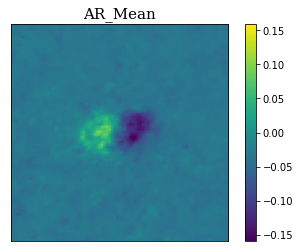

In [ ]:
plotMean(new_AR_dataset.squeeze(),'AR_Mean')

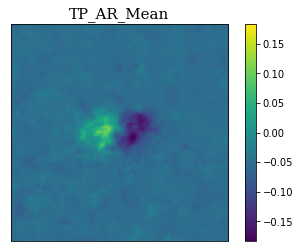

In [ ]:
plotMean(TP_AR,'TP_AR_Mean')

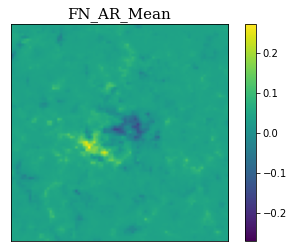

In [ ]:
plotMean(FN_AR,'FN_AR_Mean')

In [ ]:
TP_index=[]
FN_index=[]
for i in range(len(y_AR_test)):
    if y_AR_test[i]==1 and y_AR_labels[i]==1:
      TP_index.append(i)
    elif y_AR_test[i]==1 and y_AR_labels[i]==0:
      FN_index.append(i)
len(FN_index),len(TP_index)

(12, 53)

In [ ]:
print("TP:",TP_index)
print("FN:",FN_index)

TP: [1, 2, 3, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 56, 58, 59, 60, 62, 63, 64]
FN: [0, 4, 6, 7, 28, 37, 38, 39, 53, 55, 57, 61]


# AR2 DATA

In [ ]:
act2_data = np.load('drive/MyDrive/Bfield Research/Datasets/darshan_rao_bfield_AR2.npz')
lst = act2_data.files
for item in lst:
    print(item)
    print(act2_data[item].shape)
    act2_dataset=act2_data[item]


arr
(512, 512, 57)


In [ ]:
new_AR2_list=[]
x=int(512/2)
for i in range(57):
  new_AR2_list.append(act2_dataset[x-42:x+43, x-42:x+43,i])
new_AR2_dataset = np.array(new_AR2_list)


In [ ]:
for i in range(len(new_AR2_dataset)):
     new_AR2_dataset[i]=normalized(new_AR2_dataset[i])

In [ ]:
# fig, axes = plt.subplots(5,11, figsize = (64,32))
# count=0
# for i in range(5):
#     for j in  range(11):
#         axes[i,j].imshow(new_AR2_dataset[count],vmin=-1,vmax=1)
#         count+=1

In [ ]:
new_AR2_dataset = new_AR2_dataset.reshape(new_AR2_dataset.shape[0],85,85,1)
y_AR2_pred= cnn.predict(new_AR2_dataset)
y_AR2_labels= [int(np.around(element)) for element in y_AR2_pred]
y_AR2_test=[1]*len(y_AR2_labels)

In [ ]:
len(y_AR2_test) , len(y_AR2_labels)

(57, 57)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
acc2= accuracy_score(y_AR2_test, y_AR2_labels)
cm2=confusion_matrix(y_AR2_test, y_AR2_labels)
print(cm2)
print(acc2)

[[ 0  0]
 [28 29]]
0.5087719298245614


In [ ]:
TN_AR2,FP_AR2,FN_AR2,TP_AR2= createPNList(y_AR2_test, y_AR2_labels,new_AR2_dataset)
FN_AR2.shape,TP_AR2.shape

((28, 85, 85), (29, 85, 85))

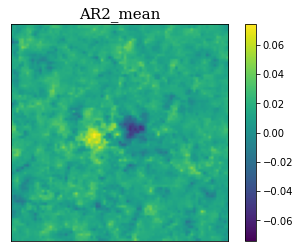

In [ ]:
plotMean(new_AR2_dataset.squeeze(),'AR2_mean')

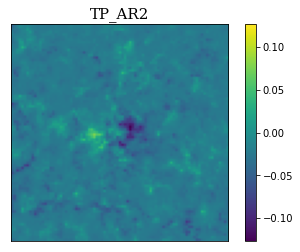

In [ ]:
plotMean(TP_AR2,'TP_AR2')

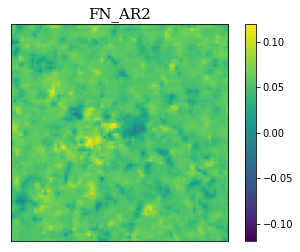

In [ ]:
plotMean(FN_AR2,'FN_AR2')

In [ ]:
TP_AR2_index=[]
FN_AR2_index=[]
for i in range(len(y_AR2_test)):
    if y_AR2_test[i]==1 and y_AR2_labels[i]==1:
      TP_AR2_index.append(i)
    elif y_AR2_test[i]==1 and y_AR2_labels[i]==0:
      FN_AR2_index.append(i)
len(FN_AR2_index),len(TP_AR2_index)

(28, 29)

In [ ]:
print("TP_AR2:",TP_AR2_index)
print("FN_AR2:",FN_AR2_index)

TP_AR2: [0, 2, 3, 4, 6, 7, 10, 11, 12, 15, 17, 18, 19, 20, 22, 24, 26, 30, 31, 33, 35, 39, 40, 43, 44, 50, 52, 54, 55]
FN_AR2: [1, 5, 8, 9, 13, 14, 16, 21, 23, 25, 27, 28, 29, 32, 34, 36, 37, 38, 41, 42, 45, 46, 47, 48, 49, 51, 53, 56]


# **AR3** DATA

In [ ]:
act3_data = np.load('drive/MyDrive/Bfield Research/Datasets/darshan_rao_bfield_AR3.npz')
lst = act3_data.files
for item in lst:
    print(item)
    print(act3_data[item].shape)
    act3_dataset=act3_data[item]

arr
(512, 512, 51)


In [ ]:
new_AR3_list=[]
x=int(512/2)
for i in range(51):
  new_AR3_list.append(act3_dataset[x-42:x+43, x-42:x+43,i])
new_AR3_dataset = np.array(new_AR3_list)

In [ ]:
for i in range(len(new_AR3_dataset)):
     new_AR3_dataset[i]=normalized(new_AR3_dataset[i])

In [ ]:
new_AR3_dataset = new_AR3_dataset.reshape(new_AR3_dataset.shape[0],85,85,1)
y_AR3_pred= cnn.predict(new_AR3_dataset)
y_AR3_labels= [int(np.around(element)) for element in y_AR3_pred]
y_AR3_test=[1]*len(y_AR3_labels)

In [ ]:
len(y_AR3_test) , len(y_AR3_labels)

(51, 51)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
acc3= accuracy_score(y_AR3_test, y_AR3_labels)
cm3=confusion_matrix(y_AR3_test, y_AR3_labels)
print(cm3)
print(acc3)

[[ 0  0]
 [18 33]]
0.6470588235294118


In [ ]:
TN_AR3,FP_AR3,FN_AR3,TP_AR3= createPNList(y_AR3_test, y_AR3_labels,new_AR3_dataset)
FN_AR3.shape,TP_AR3.shape

((18, 85, 85), (33, 85, 85))

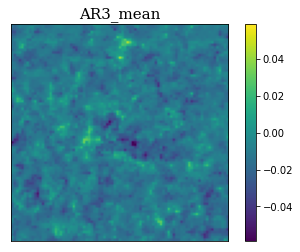

In [ ]:
plotMean(new_AR3_dataset.squeeze(),'AR3_mean')

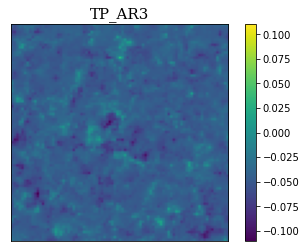

In [ ]:
plotMean(TP_AR3,'TP_AR3')

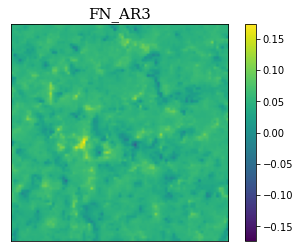

In [ ]:
plotMean(FN_AR3,'FN_AR3')

In [ ]:
TP_AR3_index=[]
FN_AR3_index=[]
for i in range(len(y_AR3_test)):
    if y_AR3_test[i]==1 and y_AR3_labels[i]==1:
      TP_AR3_index.append(i)
    elif y_AR3_test[i]==1 and y_AR3_labels[i]==0:
      FN_AR3_index.append(i)
len(FN_AR3_index),len(TP_AR3_index)

(18, 33)

In [ ]:
print("TP_AR3:",TP_AR3_index)
print("FN_AR3:",FN_AR3_index)

TP_AR3: [1, 2, 5, 6, 7, 8, 9, 10, 11, 14, 15, 16, 17, 19, 20, 21, 24, 26, 28, 30, 31, 32, 33, 36, 37, 42, 44, 45, 46, 47, 48, 49, 50]
FN_AR3: [0, 3, 4, 12, 13, 18, 22, 23, 25, 27, 29, 34, 35, 38, 39, 40, 41, 43]


# AR4 DATA

In [ ]:
act4_data = np.load('drive/MyDrive/Bfield Research/Datasets/darshan_rao_bfield_AR4.npz')
lst = act4_data.files
for item in lst:
    print(item)
    print(act4_data[item].shape)
    act4_dataset=act4_data[item]

arr
(512, 512, 47)


In [ ]:
new_AR4_list=[]
x=int(512/2)
for i in range(47):
  new_AR4_list.append(act4_dataset[x-42:x+43, x-42:x+43,i])
new_AR4_dataset = np.array(new_AR4_list)

In [ ]:
for i in range(len(new_AR4_dataset)):
     new_AR4_dataset[i]=normalized(new_AR4_dataset[i])

In [ ]:
new_AR4_dataset = new_AR4_dataset.reshape(new_AR4_dataset.shape[0],85,85,1)
y_AR4_pred= cnn.predict(new_AR4_dataset)
y_AR4_labels= [int(np.around(element)) for element in y_AR4_pred]
y_AR4_test=[1]*len(y_AR4_labels)

In [ ]:
len(y_AR4_test) , len(y_AR4_labels)

(47, 47)

In [ ]:
acc4= accuracy_score(y_AR4_test, y_AR4_labels)
cm4=confusion_matrix(y_AR4_test, y_AR4_labels)
print(cm4)
print(acc4)

[[ 0  0]
 [19 28]]
0.5957446808510638


In [ ]:
TN_AR4,FP_AR4,FN_AR4,TP_AR4= createPNList(y_AR4_test, y_AR4_labels,new_AR4_dataset)
FN_AR4.shape,TP_AR4.shape

((19, 85, 85), (28, 85, 85))

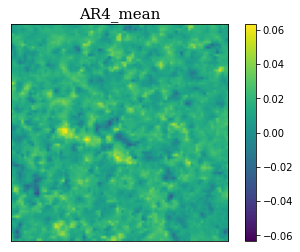

In [ ]:
plotMean(new_AR4_dataset.squeeze(),'AR4_mean')

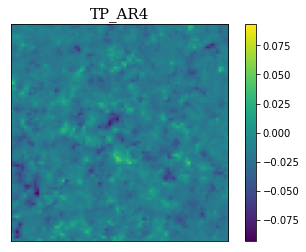

In [ ]:
plotMean(TP_AR4,'TP_AR4')

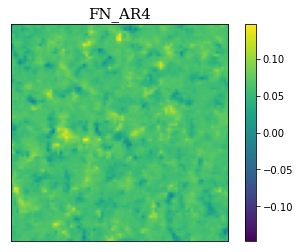

In [ ]:
plotMean(FN_AR4,'FN_AR4')

In [ ]:
TP_AR4_index=[]
FN_AR4_index=[]
for i in range(len(y_AR4_test)):
    if y_AR4_test[i]==1 and y_AR4_labels[i]==1:
      TP_AR4_index.append(i)
    elif y_AR4_test[i]==1 and y_AR4_labels[i]==0:
      FN_AR4_index.append(i)
len(FN_AR4_index),len(TP_AR4_index)

(19, 28)

In [ ]:
print("TP_AR4:",TP_AR4_index)
print("FN_AR4:",FN_AR4_index)

TP_AR4: [1, 2, 5, 6, 7, 8, 9, 11, 12, 13, 15, 16, 18, 20, 23, 25, 26, 30, 31, 34, 35, 36, 38, 39, 41, 42, 44, 45]
FN_AR4: [0, 3, 4, 10, 14, 17, 19, 21, 22, 24, 27, 28, 29, 32, 33, 37, 40, 43, 46]


# AR5 DATA

In [ ]:
act5_data = np.load('drive/MyDrive/Bfield Research/Datasets/darshan_rao_bfield_AR5.npz')
lst = act5_data.files
for item in lst:
    print(item)
    print(act5_data[item].shape)
    act5_dataset=act5_data[item]

arr
(108, 85, 85)


In [ ]:
new_AR5_list=[]
x=int(512/2)
for i in range(108):
  new_AR5_list.append(act5_dataset[i,:,:])
new_AR5_dataset = np.array(new_AR5_list)

In [ ]:
unnorm_new_AR5_dataset=new_AR5_dataset.copy()
for i in range(len(new_AR5_dataset)):
     new_AR5_dataset[i]=normalized(new_AR5_dataset[i])

In [ ]:
new_AR5_dataset = new_AR5_dataset.reshape(new_AR5_dataset.shape[0],85,85,1)
y_AR5_pred= cnn.predict(new_AR5_dataset)
y_AR5_labels= [int(np.around(element)) for element in y_AR5_pred]
y_AR5_test=[1]*len(y_AR5_labels)

In [ ]:
len(y_AR5_test) , len(y_AR5_labels)

(108, 108)

In [ ]:
acc5= accuracy_score(y_AR5_test, y_AR5_labels)
cm5=confusion_matrix(y_AR5_test, y_AR5_labels)
print('Confusion Matrix:')
print(cm5)
print('Accuracy:')
print(acc5)

Confusion Matrix:
[[ 0  0]
 [53 55]]
Accuracy:
0.5092592592592593


In [ ]:
TN_AR5,FP_AR5,FN_AR5,TP_AR5= createPNList(y_AR5_test, y_AR5_labels,new_AR5_dataset)
FN_AR5.shape,TP_AR5.shape

((53, 85, 85), (55, 85, 85))

In [ ]:
TP_AR5_index=[]
FN_AR5_index=[]
for i in range(len(y_AR5_test)):
    if y_AR5_test[i]==1 and y_AR5_labels[i]==1:
      TP_AR5_index.append(i)
    elif y_AR5_test[i]==1 and y_AR5_labels[i]==0:
      FN_AR5_index.append(i)
len(FN_AR5_index),len(TP_AR5_index)

(53, 55)

In [ ]:
print("TP_AR5:",TP_AR5_index)
print("FN_AR5:",FN_AR5_index)

TP_AR5: [0, 1, 2, 4, 5, 6, 7, 9, 10, 12, 13, 15, 17, 19, 24, 27, 28, 29, 30, 32, 35, 36, 37, 40, 41, 42, 43, 45, 50, 51, 54, 55, 56, 61, 62, 64, 65, 67, 71, 77, 78, 80, 82, 83, 85, 86, 87, 91, 92, 96, 98, 99, 100, 102, 103]
FN_AR5: [3, 8, 11, 14, 16, 18, 20, 21, 22, 23, 25, 26, 31, 33, 34, 38, 39, 44, 46, 47, 48, 49, 52, 53, 57, 58, 59, 60, 63, 66, 68, 69, 70, 72, 73, 74, 75, 76, 79, 81, 84, 88, 89, 90, 93, 94, 95, 97, 101, 104, 105, 106, 107]


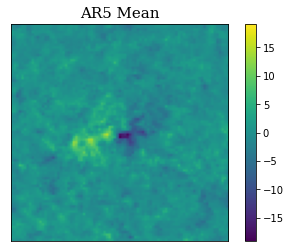

In [ ]:
plotMean(unnorm_new_AR5_dataset.squeeze(),'AR5 Mean')

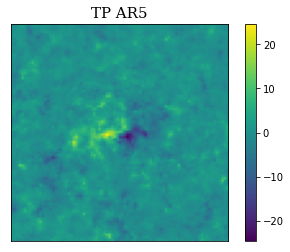

In [ ]:
plotMean(unnorm_new_AR5_dataset[TP_AR5_index],'TP AR5')

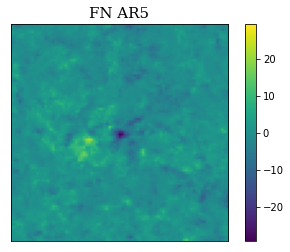

In [ ]:
plotMean(unnorm_new_AR5_dataset[FN_AR5_index],'FN AR5')

In [ ]:
# fig, axes = plt.subplots(11,10, figsize = (64,128))
# count=0
# for i in range(11):
#     for j in  range(10):
#         axes[i,j].imshow(new_AR5_dataset[count].squeeze(),vmin=-1,vmax=1)
#         count+=1

In [ ]:
hp=[0,1,2,4,5,10,12,13,16,18,19,20,27,28,29,42,46,51,53,56,60,62,63,69,70,71,83,86]
handpicked=unnorm_new_AR5_dataset[hp].squeeze()
nhp=[]
tppminushp_index=[]
totalminushp=[]

for z in range(108):
  if z not in hp:
    nhp.append(z)
nonhandpicked=unnorm_new_AR5_dataset[nhp].squeeze()

for x in TP_AR5_index:
  if x not in hp:
    tppminushp_index.append(x)
print(tppminushp_index)
tppminushp=unnorm_new_AR5_dataset[tppminushp_index].squeeze()


[6, 7, 9, 15, 17, 24, 30, 32, 35, 36, 37, 40, 41, 43, 45, 50, 54, 55, 61, 64, 65, 67, 77, 78, 80, 82, 85, 87, 91, 92, 96, 98, 99, 100, 102, 103]


In [ ]:
def common(lst1, lst2): 
    return list(set(lst1) & set(lst2))


In [ ]:

print(common(TP_AR5_index,hp))
print(hp)
len(common(TP_AR5_index,hp)),len(hp)

[0, 1, 2, 4, 5, 10, 12, 13, 19, 27, 28, 29, 42, 51, 56, 62, 71, 83, 86]
[0, 1, 2, 4, 5, 10, 12, 13, 16, 18, 19, 20, 27, 28, 29, 42, 46, 51, 53, 56, 60, 62, 63, 69, 70, 71, 83, 86]


(19, 28)

In [ ]:
len(handpicked),len(nonhandpicked),len(tppminushp)

(28, 80, 36)

In [ ]:
# fig, axes = plt.subplots(6,5, figsize = (64,128))
# count=0
# for i in range(6):
#     for j in  range(5):
#         axes[i,j].imshow(handpicked[count],cmap='binary')
#         count+=1

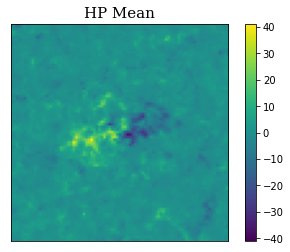

In [ ]:
plotMean(handpicked,'HP Mean')

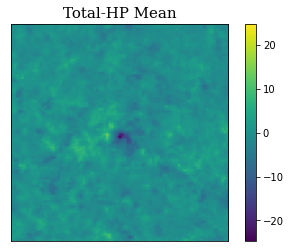

In [ ]:
plotMean(nonhandpicked,'Total-HP Mean')

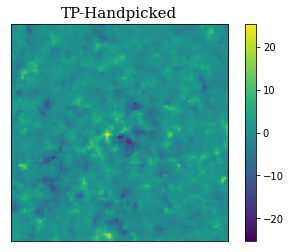

In [ ]:
plotMean(tppminushp,'TP-Handpicked')

In [ ]:
# figure, axis = plt.subplots(1, 6)
# axis[0, 0]=plotMean(unnorm_new_AR5_dataset.squeeze(),'AR5 Mean') 
# axis[0, 0].set_title("Sine Function")
  
# # For Cosine Function
# axis[0, 1].plot(X, Y2)
# axis[0, 1].set_title("Cosine Function")
  
# # For Tangent Function
# axis[1, 0].plot(X, Y3)
# axis[1, 0].set_title("Tangent Function")
  
# # For Tanh Function
# axis[1, 1].plot(X, Y4)
# axis[1, 1].set_title("Tanh Function")

In [ ]:
# fnplot=unnorm_new_AR5_dataset[FN_AR5_index].squeeze()
# fig, axes = plt.subplots(9,5, figsize = (32,64))
# count=0
# for i in range(9):
#     for j in  range(5):
#         axes[i,j].imshow(fnplot[count],cmap='binary')
#         count+=1

In [ ]:
# tpplot=unnorm_new_AR5_dataset[TP_AR5_index].squeeze()
# fig, axes = plt.subplots(7,10, figsize = (64,64))
# count=0
# for i in range(7):
#     for j in  range(10):
#         axes[i,j].imshow(tpplot[count],cmap='binary')
#         count+=1

# AR6 DATA

In [ ]:
act6_data = np.load('drive/MyDrive/Bfield Research/Datasets/darshan_rao_bfield_AR6.npz')
lst = act6_data.files
for item in lst:
    print(item)
    print(act6_data[item].shape)
    act6_dataset=act6_data[item]

arr
(512, 512, 53)


In [ ]:
new_AR6_list=[]
x=int(512/2)
for i in range(53):
  new_AR6_list.append(act6_dataset[x-42:x+43, x-42:x+43,i])
new_AR6_dataset = np.array(new_AR6_list)

In [ ]:
for i in range(len(new_AR6_dataset)):
     new_AR6_dataset[i]=normalized(new_AR6_dataset[i])

In [ ]:
new_AR6_dataset = new_AR6_dataset.reshape(new_AR6_dataset.shape[0],85,85,1)
y_AR6_pred= cnn.predict(new_AR6_dataset)
y_AR6_labels= [int(np.around(element)) for element in y_AR6_pred]
y_AR6_test=[1]*len(y_AR6_labels)

In [ ]:
len(y_AR6_test) , len(y_AR6_labels)

(53, 53)

In [ ]:
acc6= accuracy_score(y_AR6_test, y_AR6_labels)
cm6=confusion_matrix(y_AR6_test, y_AR6_labels)
print(cm6)
print(acc6)

[[ 0  0]
 [23 30]]
0.5660377358490566


In [ ]:
TN_AR6,FP_AR6,FN_AR6,TP_AR6= createPNList(y_AR6_test, y_AR6_labels,new_AR6_dataset)
FN_AR6.shape,TP_AR6.shape

((23, 85, 85), (30, 85, 85))

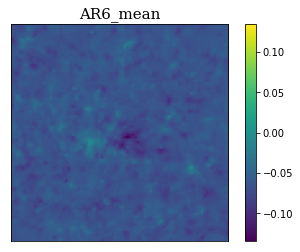

In [ ]:
plotMean(new_AR6_dataset.squeeze(),'AR6_mean')

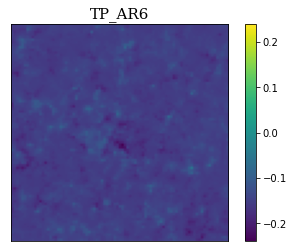

In [ ]:
plotMean(TP_AR6,'TP_AR6')

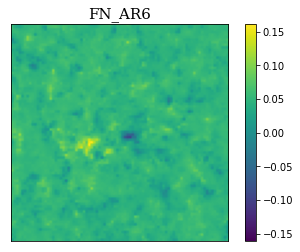

In [ ]:
plotMean(FN_AR6,'FN_AR6')

In [ ]:
TP_AR6_index=[]
FN_AR6_index=[]
for i in range(len(y_AR6_test)):
    if y_AR6_test[i]==1 and y_AR5_labels[i]==1:
      TP_AR6_index.append(i)
    elif y_AR6_test[i]==1 and y_AR6_labels[i]==0:
      FN_AR6_index.append(i)
len(FN_AR6_index),len(TP_AR6_index)

(13, 30)

In [ ]:
print("TP_AR6:",TP_AR6_index)
print("FN_AR6:",FN_AR6_index)

TP_AR6: [0, 1, 2, 4, 5, 6, 7, 9, 10, 12, 13, 15, 17, 19, 24, 27, 28, 29, 30, 32, 35, 36, 37, 40, 41, 42, 43, 45, 50, 51]
FN_AR6: [11, 14, 18, 20, 25, 26, 33, 34, 38, 39, 44, 46, 47]


# **FLOW_DATA**

In [ ]:
flow_data = np.load('drive/MyDrive/Bfield Research/Datasets/tpi_fni_newdata.npz')
lst = flow_data.files
print(flow_data['tpi'].shape)
tni=flow_data['tpi']
print(flow_data['fni'].shape)
fni=flow_data['fni']

(53,)
(55,)


In [ ]:
tni.shape,fni.shape

((53,), (55,))

In [ ]:
tni

array([11813, 11152, 11597, 12003, 11945, 11978, 11456, 11511, 11300,
       11670, 11242, 11385, 11807, 11148, 11273, 11070, 11334, 11209,
       11416, 11915, 11510, 11141, 11130, 11116, 11640, 11627, 11824,
       11780, 11849, 11969, 11198, 11075, 11211, 11726, 11404, 11076,
       11137, 11500, 11702, 11842, 11843, 11867, 11414, 11703, 11318,
       11549, 11645, 11776, 11122, 11214, 12011, 11911, 11400])

In [ ]:
fni

array([11821, 11855, 11781, 11624, 12118, 11910, 11079, 11561, 11631,
       11962, 11431, 11310, 11570, 12119, 11174, 11565, 11080, 12105,
       11607, 11406, 11105, 11158, 11086, 11446, 11707, 11114, 11697,
       11699, 11706, 11311, 11239, 11297, 11066, 12098, 11199, 11136,
       11072, 11924, 11081, 12039, 11951, 11304, 11686, 11531, 11603,
       11437, 11154, 11874, 11752, 11074, 11786, 12041, 11322, 11551,
       11222])

In [ ]:
mag_ar_data = np.load('drive/MyDrive/Bfield Research/Datasets/mag_ar_list.npz')
lst = mag_ar_data.files
for item in lst:
    print(item)
    print(mag_ar_data[item].shape)
    mag_ar_dataset=mag_ar_data[item]

arr
(108,)


In [ ]:
mag_ar_dataset

array([11152, 11821, 11813, 11781, 11597, 11855, 11910, 12118, 11624,
       12003, 11079, 11561, 11631, 11945, 11978, 11456, 11962, 11431,
       11511, 11310, 11570, 11242, 11300, 11670, 12119, 11807, 11174,
       11565, 11385, 11148, 11070, 11334, 11273, 11915, 11416, 11209,
       11141, 11080, 12105, 11510, 11116, 11607, 11640, 11130, 11105,
       11406, 11158, 11627, 11824, 11086, 11707, 11446, 11697, 11114,
       11780, 11849, 11969, 11699, 11706, 11311, 11211, 11198, 11075,
       11239, 11297, 11199, 11066, 12098, 11136, 11404, 11726, 11072,
       11924, 11500, 11076, 11137, 11081, 11702, 11951, 12039, 11842,
       11686, 11304, 11843, 11531, 11414, 11867, 11603, 11703, 11549,
       11437, 11318, 11154, 11752, 11874, 11645, 11074, 12041, 11786,
       11776, 12011, 11322, 11214, 11122, 11222, 11551, 11911, 11400])

In [ ]:
mag_TP_list=[]
mag_FN_list=[]
for i in range(len(mag_ar_dataset)):
  for j in range(len(tni)):
    if mag_ar_dataset[i]==tni[j]:
      mag_TP_list.append(i)
  for j in range(len(fni)):
    if mag_ar_dataset[i]==fni[j]:
      mag_FN_list.append(i)




In [ ]:
len(mag_TP_list),len(mag_FN_list)

(53, 55)

In [ ]:
len(common(mag_TP_list,TP_AR5_index)),len(common(mag_TP_list,FN_AR5_index)),len(common(mag_FN_list,TP_AR5_index)),len(common(mag_FN_list,FN_AR5_index))

(30, 23, 25, 30)

In [ ]:
tptp=new_AR5_dataset[common(mag_TP_list,TP_AR5_index)].squeeze()
tpfn=new_AR5_dataset[common(mag_TP_list,FN_AR5_index)].squeeze()
fntp=new_AR5_dataset[common(mag_FN_list,TP_AR5_index)].squeeze()
fnfn=new_AR5_dataset[common(mag_FN_list,FN_AR5_index)].squeeze()

In [ ]:
tptpi=mag_ar_dataset[common(mag_TP_list,TP_AR5_index)]
tpfni=mag_ar_dataset[common(mag_TP_list,FN_AR5_index)]
fntpi=mag_ar_dataset[common(mag_FN_list,TP_AR5_index)]
fnfni=mag_ar_dataset[common(mag_FN_list,FN_AR5_index)]

In [ ]:
print(fnfni)

[11781 11624 11561 11962 11570 11174 12105 11105 11158 11086 11697 11114
 11699 11706 11311 11239 11066 11136 11924 11081 12039 11686 11531 11437
 11752 11874 12041 11322 11222 11551]


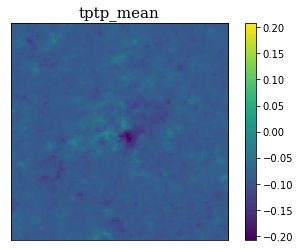

In [ ]:
plotMean(tptp,'tptp_mean')

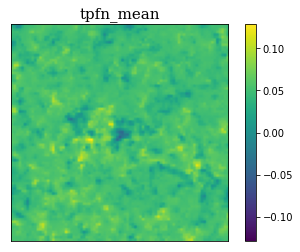

In [ ]:
plotMean(tpfn,'tpfn_mean')

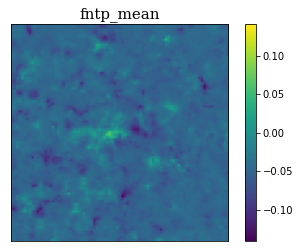

In [ ]:
plotMean(fntp,'fntp_mean')

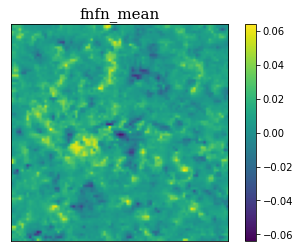

In [ ]:
plotMean(fnfn,'fnfn_mean')

In [ ]:
print(common(mag_TP_list,TP_AR5_index))
print(common(mag_TP_list,FN_AR5_index))
print(common(mag_FN_list,TP_AR5_index))
print(common(mag_FN_list,FN_AR5_index))

[0, 2, 4, 9, 13, 15, 28, 29, 30, 32, 35, 36, 40, 42, 43, 54, 55, 56, 61, 62, 77, 80, 83, 85, 86, 91, 99, 100, 102, 103]
[14, 18, 21, 22, 23, 25, 31, 33, 34, 39, 47, 48, 60, 69, 70, 73, 74, 75, 88, 89, 95, 106, 107]
[1, 5, 6, 7, 10, 12, 17, 19, 24, 27, 37, 41, 45, 50, 51, 64, 65, 67, 71, 78, 82, 87, 92, 96, 98]
[3, 8, 11, 16, 20, 26, 38, 44, 46, 49, 52, 53, 57, 58, 59, 63, 66, 68, 72, 76, 79, 81, 84, 90, 93, 94, 97, 101, 104, 105]


<function matplotlib.pyplot.show>

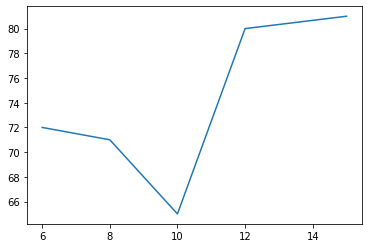

In [ ]:
revsnr=np.array([6,8,10,12,15])
tps=np.array([72,71,65,80,81])

plt.plot(revsnr, tps)
plt.show
